<a href="https://colab.research.google.com/github/AndrewCrossman/Other/blob/main/Stock_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Open [robinhood](https://robinhood.com/) trading app and use stock names in datareader.

Cryptocurrency Data Prices provided by [CoinGecko](https://www.coingecko.com/) with [documention](https://www.coingecko.com/en/api/documentation)

### INSTALLATIONS

In [ ]:
!pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pycoingecko

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### IMPORTS

In [ ]:
import pandas as pd
from pandas_datareader import data,wb
import pycoingecko
from pycoingecko import CoinGeckoAPI
from datetime import date
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt

## STOCK ANALYSES

### CHOOSE STOCK, STARTDATE, ENDDATE, AND PLOT RANGE

In [ ]:
# choose the date at which to start the stock analysis
startdate = pd.to_datetime(date.today() + relativedelta(months=-24))
# choose the current day
enddate = pd.to_datetime(date.today())

# choose the stock to analyze
"BE MSFT TSLA AMZ TSM NCLH BABA NVDA NOK"
df = data.DataReader("NOK", 'stooq', startdate, enddate)
df

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-06,4.71000,4.83000,4.66000,4.83000,1.591398e+07
2023-01-05,4.72000,4.74000,4.68110,4.69000,1.525471e+07
2023-01-04,4.79000,4.80000,4.72000,4.73000,1.608443e+07
2023-01-03,4.68000,4.74000,4.66000,4.69000,1.637612e+07
2022-12-30,4.63000,4.65000,4.60000,4.64000,1.128408e+07
...,...,...,...,...,...
2021-01-13,3.87638,3.94576,3.87638,3.94576,3.405607e+07
2021-01-12,3.90610,3.98542,3.89626,3.97558,2.629093e+07
2021-01-11,3.80701,3.90610,3.79706,3.83672,3.738067e+07


### CACULATE MOVING AVERAGES AND BOLLINGER BANDS

> Short Term MA crosses above Long Term MA -> Buy

> Short Term MA crosses below Long Term MA -> Sell

> Additional information on moving averages can be found [here](https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp).

> Information on Bollinger Bands can be found [here]()


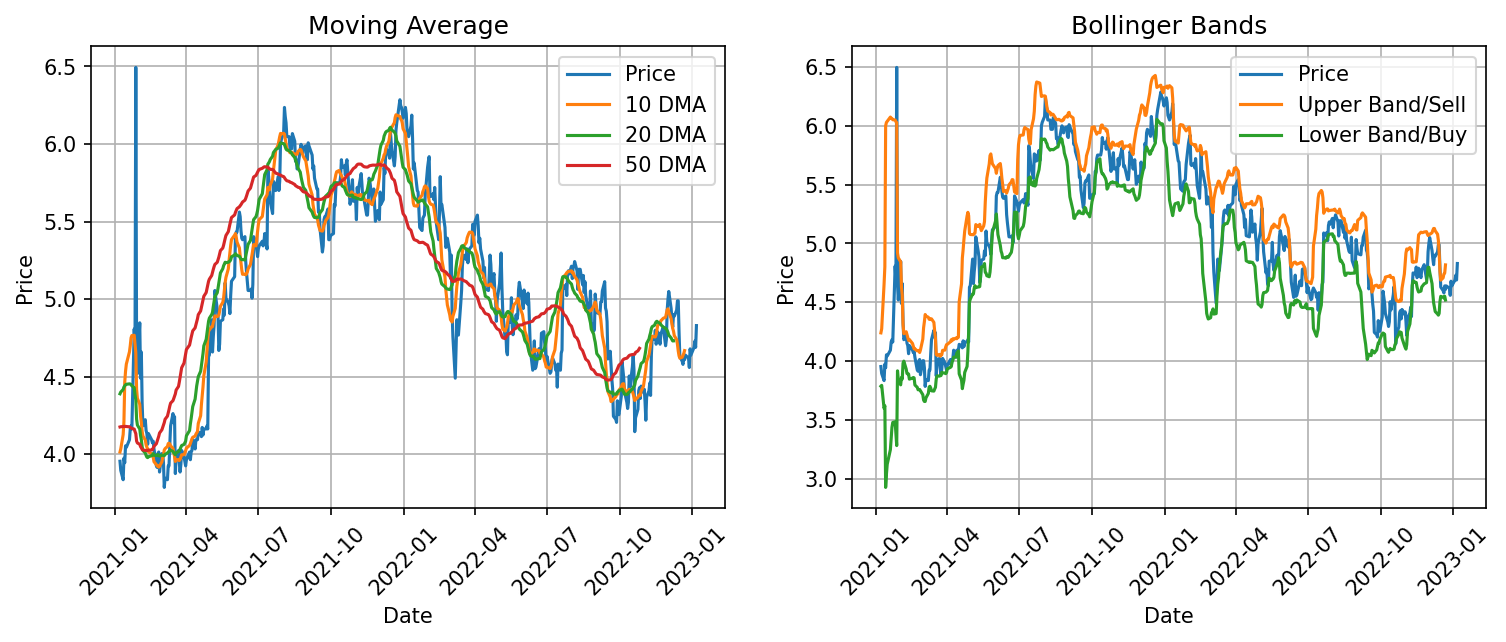

In [ ]:
# Calculate the moving average
df['MA10'] = df['Close'].rolling(window=10).mean()
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()
# Calculate the Bollinger Bands
df['STD10'] = df['Close'].rolling(window=10).std()
df['STD20'] = df['Close'].rolling(window=20).std()
df['STD50'] = df['Close'].rolling(window=50).std()
df['Upper_Band10'] = df['MA10'] + 2 * df['STD10']
df['Lower_Band10'] = df['MA10'] - 2 * df['STD10']
df['Upper_Band20'] = df['MA20'] + 2 * df['STD20']
df['Lower_Band20'] = df['MA20'] - 2 * df['STD20']
df['Upper_Band50'] = df['MA50'] + 2 * df['STD50']
df['Lower_Band50'] = df['MA50'] - 2 * df['STD50']

# Plot the moving average
plt.figure(figsize=(12,4), dpi=150)
plt.style.use('default')
plt.subplot(1, 2, 1)
plt.plot( df['Close'], label='Price')
plt.plot( df['MA10'], label='10 DMA')
plt.plot( df['MA20'], label='20 DMA')
plt.plot( df['MA50'], label='50 DMA')
plt.title('Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.xticks(rotation = 45)
# Plot the Bollinger Bands
plt.subplot(1, 2, 2)
plt.plot( df['Close'], label='Price')
plt.plot( df['Upper_Band10'], label='Upper Band/Sell')
plt.plot(df['Lower_Band10'], label='Lower Band/Buy')
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.xticks(rotation = 45)
plt.show()

### CALCULATE RSI


> RSI details can be found [here](https://www.investopedia.com/terms/r/rsi.asp#:~:text=The%20relative%20strength%20index%20(RSI)%20is%20a%20momentum%20indicator%20used,scale%20of%20zero%20to%20100.).



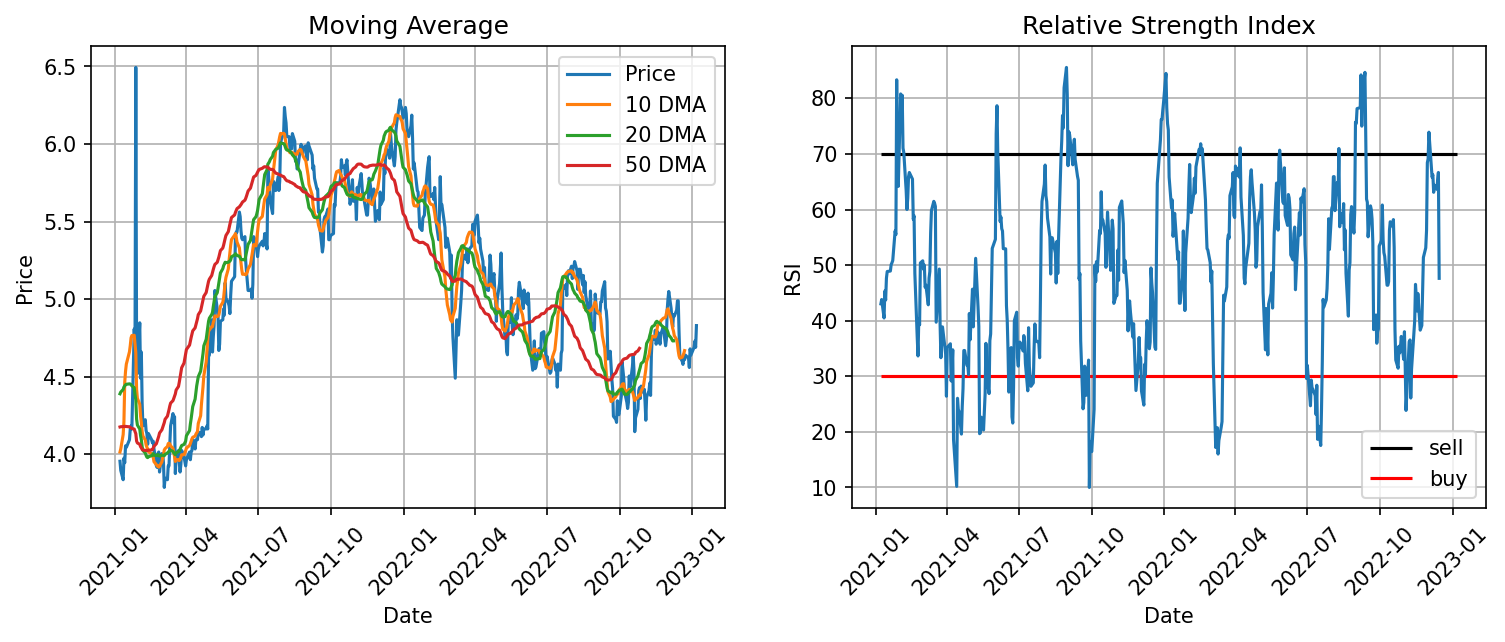

In [ ]:
# Calculate the RSI
diff = df['Close'].diff()
up, down = diff.copy(), diff.copy()
up[up < 0] = 0
down[down > 0] = 0

roll_up = up.rolling(window=14).mean()
roll_down = down.abs().rolling(window=14).mean()
rs = roll_up / roll_down
rsi = 100.0 - (100.0 / (1.0 + rs))

# Plot the moving average
plt.figure(figsize=(12,4), dpi=150)
plt.style.use('default')
plt.subplot(1, 2, 1)
plt.plot( df['Close'], label='Price')
plt.plot( df['MA10'], label='10 DMA')
plt.plot( df['MA20'], label='20 DMA')
plt.plot( df['MA50'], label='50 DMA')
plt.title('Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.xticks(rotation = 45)
# Plot the RSI
plt.subplot(1, 2, 2)
plt.plot(rsi)
plt.title('Relative Strength Index')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.hlines(70,startdate,enddate,'k',label='sell')
plt.hlines(30,startdate,enddate,'r',label='buy')
plt.legend()
plt.xticks(rotation = 45)
plt.grid()
plt.show()

### CALCULATE THE MACD AND SIGNAL

> MACD crossing above zero is considered bullish, while crossing below zero is bearish. Secondly, when MACD turns up from below zero it is considered bullish. When it turns down from above zero it is considered bearish

> When the MACD line crosses from below to above the signal line, the indicator is considered bullish. The further below the zero line the stronger the signal.

> When the MACD line crosses from above to below the signal line, the indicator is considered bearish. The further above the zero line the stronger the signal.

> Info taken from [here](https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/macd#:~:text=When%20the%20MACD%20line%20crosses,line%20the%20stronger%20the%20signal.).


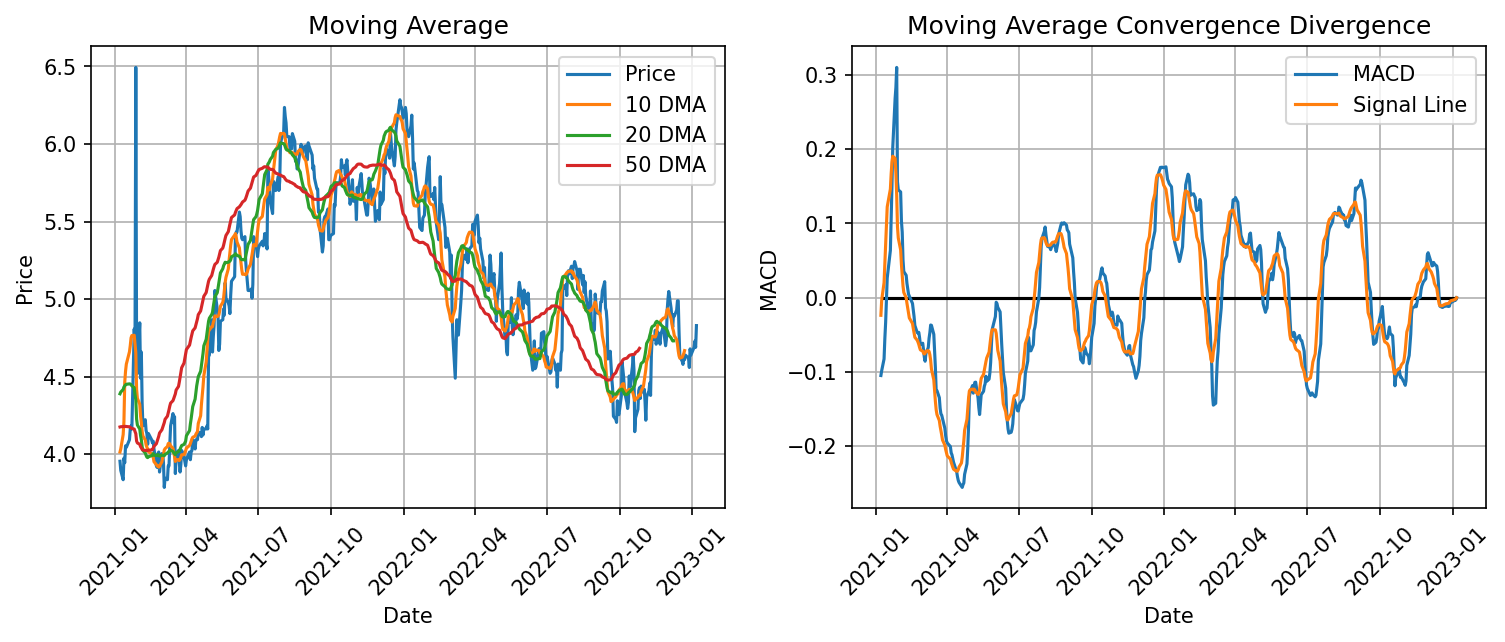

In [ ]:
# Calculate the MACD
ema_12 = df['Close'].ewm(span=12).mean()
ema_26 = df['Close'].ewm(span=26).mean()
macd = ema_12 - ema_26
# Calculate the signal line
signal = macd.ewm(span=9).mean()

# Plot the moving average
plt.figure(figsize=(12,4), dpi=150)
plt.style.use('default')
plt.subplot(1, 2, 1)
plt.plot( df['Close'], label='Price')
plt.plot( df['MA10'], label='10 DMA')
plt.plot( df['MA20'], label='20 DMA')
plt.plot( df['MA50'], label='50 DMA')
plt.title('Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.xticks(rotation = 45)
# Plot the MACD and signal line
plt.subplot(1, 2, 2)
plt.plot(macd, label='MACD')
plt.plot(signal, label='Signal Line')
plt.hlines(0,startdate,enddate,'k')
plt.title('Moving Average Convergence Divergence')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.grid()
plt.xticks(rotation = 45)
plt.show()

## CRYTOCURRENCY ANALYSIS

In [ ]:
cg = CoinGeckoAPI()
#df = data.DataReader('BTC', 'coingecko', api_key=cg.api_key)
cg1 = pycoingecko.CoinGeckoAPI(api_key=cg.api_key)

In [ ]:
start_date = '2020-01-01'
end_date = '2022-01-01'
df = pd.DataFrame(cg1.get_coin_market_chart_by_id(id='bitcoin',vs_currency='usd',days='2'))

In [ ]:
df.prices = df.prices[1]


ValueError: ignored

In [ ]:
# Calculate the moving average
df['MA'] = df['prices'].rolling(window=10).mean()

# Plot the moving average
plt.figure(figsize=(6,4), dpi=200) 
plt.plot(df['prices'], label='Price')
plt.plot( df['MA'], label='Moving Average')
plt.title('Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Calculate the Bollinger Bands
df['STD'] = df['prices'].rolling(window=20).std()
df['Upper Band'] = df['MA'] + 2 * df['STD']
df['Lower Band'] = df['MA'] - 2 * df['STD']

# Plot the Bollinger Bands
plt.figure(figsize=(6,4), dpi=200) 
plt.plot( df['prices'], label='Price')
plt.plot( df['Upper Band'], label='Upper Band/Sell')
plt.plot(df['Lower Band'], label='Lower Band/Buy')
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()